In [1]:
import json
import pandas as pd
import numpy as np
from matplotlib import image
from matplotlib import pyplot as plt
from shapely.wkt import loads
import cv2 as cv
import shapely

In [2]:
label_file = open('./Data/Json/mexico-earthquake_00000000_post_disaster.json')
label_data =json.load(label_file)
img = image.imread('./Data/Images/mexico-earthquake_00000000_post_disaster.png')

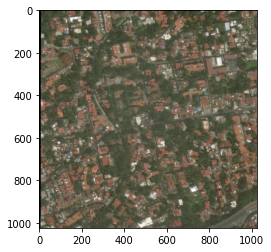

In [3]:
plt.imshow(img)

In [16]:
divisions = 10
grid_size = np.floor(np.divide(img.shape[:2],divisions)).astype(np.int32)    

array([102, 102])

In [ ]:
shapely.linearrings([[0,0],[0,1],[1,1],[1,0]])

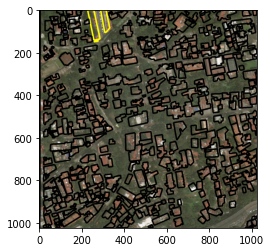

In [6]:
colours_dict = {'no-damage':None,
           'minor-damage':[1,1,0]
           }


polygons = []
damage_state = []
colours = []
for _obj in label_data['features']['xy']:
    _polygon = loads(_obj['wkt'])
    polygons.append(_polygon)
    _polygon = np.array(list(_polygon.exterior.coords),dtype=np.int32)
    colour = colours_dict[_obj['properties']['subtype']]
    img = cv.polylines(img,[_polygon],True,colour,5)
    
plt.imshow(img)

In [7]:
polygons

[<POLYGON ((232.3 713.84, 229.49 716.31, 202.233 718.126, 194.11 709.26, 193....>,
 <POLYGON ((869.87 269.53, 874.02 291.1, 873.13 293.72, 812.474 306.441, 806....>,
 <POLYGON ((797.5 226.79, 806.259 279.365, 812.259 305.365, 790.28 308.11, 78...>,
 <POLYGON ((911.25 212, 912.95 222.21, 910.45 224.44, 870.14 230.71, 868.01 2...>,
 <POLYGON ((960.21 262.93, 963.11 277.44, 961.81 280.27, 947.18 282.47, 943.0...>,
 <POLYGON ((944.37 198.27, 946.081 205.989, 924.081 208.989, 911.081 210.989,...>,
 <POLYGON ((949.07 206.5, 951.55 223.86, 950.34 226.88, 934.26 229.18, 930.48...>,
 <POLYGON ((34.27 794.28, 27.487 799.812, 21.941 804.559, 21.951 799.467, 22....>,
 <POLYGON ((314.638 0.003, 332.16 84.345, 313.836 105.029, 308.03 103.953, 28...>,
 <POLYGON ((286.15 133.13, 284.33 136.95, 276.512 138.163, 277.568 146.612, 2...>,
 <POLYGON ((327.251 12.241, 340.882 6.702, 342.822 11.479, 327.896 17.25, 327...>,
 <POLYGON ((328.087 18.895, 344.58 11.827, 346.52 16.054, 339.868 22.291, 340...>,
 <PO